## Лабораторная работа №3. Обработка признаков (часть 2).
**Задание:**

Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
1. масштабирование признаков (не менее чем тремя способами);
2. обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
3. обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
4. отбор признаков:
- один метод из группы методов фильтрации (filter methods);
- один метод из группы методов обертывания (wrapper methods);
- один метод из группы методов вложений (embedded methods).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
data_loaded = pd.read_csv('world-happiness-report-2021.csv', sep=',')
data = data_loaded.rename(columns={
}).dropna()
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.430,1.446,1.106,0.741,0.691,0.124,0.481,3.253
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.430,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.430,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.430,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.430,1.543,1.108,0.782,0.703,0.249,0.427,2.580


#### Маштабирование признаков

In [7]:
data_to_scale = data.drop(['Country name','Regional indicator'], axis=1)
data_to_scale.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000
mean,5.497,0.059,5.612,5.382,9.428,0.812,64.855,0.788,-0.011,0.730,2.430,0.976,0.788,0.516,0.494,0.180,0.134,2.410
std,1.098,0.022,1.078,1.119,1.168,0.115,6.844,0.115,0.151,0.176,0.000,0.408,0.260,0.216,0.140,0.099,0.113,0.536
min,2.523,0.026,2.596,2.449,6.635,0.463,48.478,0.382,-0.288,0.082,2.430,0.000,0.000,0.000,0.000,0.000,0.000,0.648
25%,4.794,0.043,4.963,4.658,8.538,0.746,59.305,0.717,-0.126,0.673,2.430,0.665,0.638,0.341,0.408,0.105,0.060,2.138
50%,5.466,0.054,5.541,5.380,9.569,0.830,66.601,0.795,-0.034,0.787,2.430,1.025,0.828,0.571,0.503,0.166,0.097,2.492
75%,6.317,0.070,6.415,6.213,10.421,0.903,69.652,0.877,0.082,0.845,2.430,1.323,0.993,0.667,0.603,0.241,0.170,2.784
max,7.842,0.173,7.904,7.780,11.647,0.983,76.953,0.960,0.542,0.939,2.430,1.751,1.172,0.897,0.703,0.541,0.547,3.482


##### На основе Z-оценки

In [8]:
scaler1 = StandardScaler()
data_scaled1 = pd.DataFrame(scaler1.fit_transform(data_to_scale), columns=data_to_scale.columns)
data_scaled1.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000
mean,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000
std,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,0.000,1.004,1.004,1.004,1.004,1.004,1.004,1.004
min,-2.719,-1.480,-2.807,-2.631,-2.400,-3.037,-2.402,-3.532,-1.836,-3.688,0.000,-2.400,-3.040,-2.401,-3.534,-1.836,-1.192,-3.299
25%,-0.643,-0.708,-0.604,-0.650,-0.765,-0.576,-0.814,-0.615,-0.760,-0.324,0.000,-0.764,-0.577,-0.814,-0.614,-0.768,-0.656,-0.510
50%,-0.028,-0.208,-0.066,-0.002,0.121,0.155,0.256,0.065,-0.150,0.325,0.000,0.122,0.156,0.257,0.066,-0.147,-0.326,0.153
75%,0.749,0.519,0.748,0.745,0.854,0.790,0.703,0.778,0.620,0.655,0.000,0.855,0.793,0.704,0.781,0.616,0.325,0.700
max,2.144,5.200,2.134,2.151,1.907,1.486,1.774,1.501,3.673,1.190,0.000,1.908,1.484,1.774,1.497,3.668,3.688,2.006


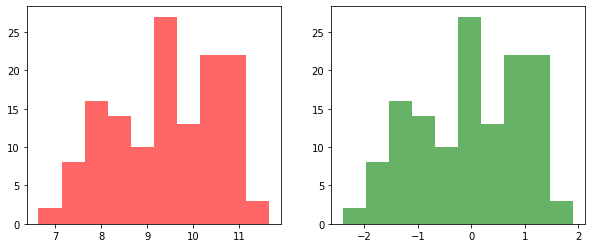

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].hist(data["Logged GDP per capita"], color="r", alpha=0.6)
axs[1].hist(data_scaled1["Logged GDP per capita"], color="g", alpha=0.6)
plt.show()

##### MinMax-масштабирование

In [11]:
scaler2 = MinMaxScaler()
data_scaled2 = pd.DataFrame(scaler2.fit_transform(data_to_scale), columns=data_to_scale.columns)
data_scaled2.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000
mean,0.559,0.222,0.568,0.550,0.557,0.672,0.575,0.702,0.333,0.756,0.000,0.557,0.672,0.575,0.702,0.334,0.244,0.622
std,0.206,0.150,0.203,0.210,0.233,0.222,0.240,0.199,0.182,0.206,0.000,0.233,0.222,0.240,0.200,0.182,0.206,0.189
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.427,0.116,0.446,0.414,0.380,0.544,0.380,0.580,0.195,0.690,0.000,0.380,0.544,0.380,0.580,0.194,0.110,0.526
50%,0.553,0.190,0.555,0.550,0.585,0.706,0.636,0.715,0.306,0.823,0.000,0.585,0.706,0.637,0.716,0.307,0.177,0.651
75%,0.713,0.299,0.719,0.706,0.755,0.846,0.744,0.856,0.446,0.890,0.000,0.756,0.847,0.744,0.858,0.445,0.311,0.754
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


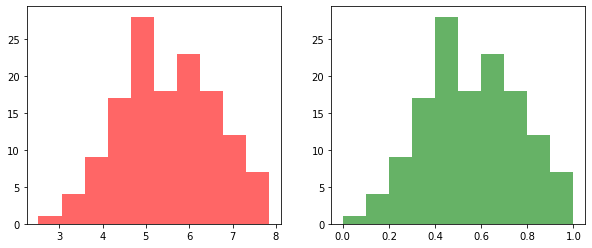

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].hist(data["Ladder score"], color="r", alpha=0.6)
axs[1].hist(data_scaled2["Ladder score"], color="g", alpha=0.6)
plt.show()

##### По максимальному значению

In [15]:
scaler3 = MaxAbsScaler()
data_scaled3 = pd.DataFrame(scaler2.fit_transform(data_to_scale), columns=data_to_scale.columns)
data_scaled3.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000
mean,0.559,0.222,0.568,0.550,0.557,0.672,0.575,0.702,0.333,0.756,0.000,0.557,0.672,0.575,0.702,0.334,0.244,0.622
std,0.206,0.150,0.203,0.210,0.233,0.222,0.240,0.199,0.182,0.206,0.000,0.233,0.222,0.240,0.200,0.182,0.206,0.189
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.427,0.116,0.446,0.414,0.380,0.544,0.380,0.580,0.195,0.690,0.000,0.380,0.544,0.380,0.580,0.194,0.110,0.526
50%,0.553,0.190,0.555,0.550,0.585,0.706,0.636,0.715,0.306,0.823,0.000,0.585,0.706,0.637,0.716,0.307,0.177,0.651
75%,0.713,0.299,0.719,0.706,0.755,0.846,0.744,0.856,0.446,0.890,0.000,0.756,0.847,0.744,0.858,0.445,0.311,0.754
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


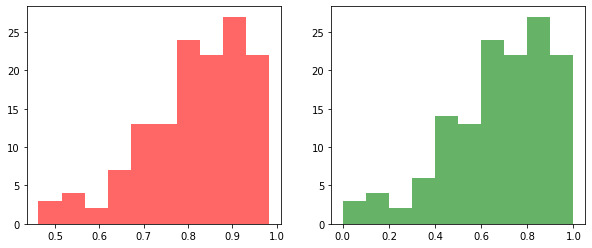

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].hist(data["Social support"], color="r", alpha=0.6)
axs[1].hist(data_scaled3["Social support"], color="g", alpha=0.6)
plt.show()

#### Обработка выбросов

In [17]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [18]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df.mean() - (K1 * df.std())
        upper_boundary = df.mean() + (K1 * df.std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df.quantile(0.05)
        upper_boundary = df.quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df.quantile(0.75) - df.quantile(0.25)
        lower_boundary = df.quantile(0.25) - (K2 * IQR)
        upper_boundary = df.quantile(0.75) + (K2 * IQR)

    return lower_boundary, upper_boundary  

In [21]:
data2 = data_scaled3.copy()

##### Замена выбросов

OutlierBoundaryType.SIGMA


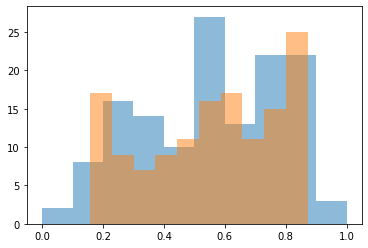

OutlierBoundaryType.QUANTILE


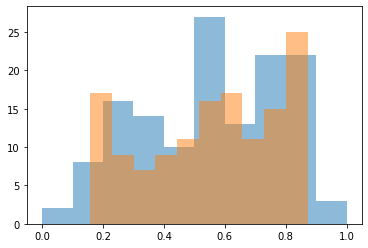

OutlierBoundaryType.IRQ


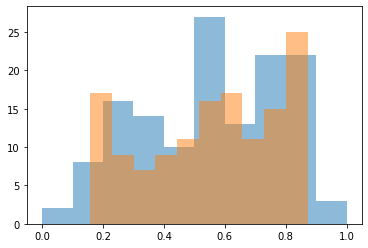

In [25]:
for obt in OutlierBoundaryType:
    lower_boundary, upper_boundary = get_outlier_boundaries(data_scaled3['Explained by: Log GDP per capita'], obt)
    data2['Explained by: Log GDP per capita'] = np.where(data_scaled3['Explained by: Log GDP per capita'] > upper_boundary, upper_boundary,
        np.where(data2['Explained by: Log GDP per capita'] < lower_boundary, lower_boundary, data2['Explained by: Log GDP per capita']))
    plt.hist(data_scaled3['Explained by: Log GDP per capita'], alpha=0.5)
    plt.hist(data2['Explained by: Log GDP per capita'], alpha=0.5)
    print(obt)
    plt.show()

##### Удаление выбросов

OutlierBoundaryType.SIGMA


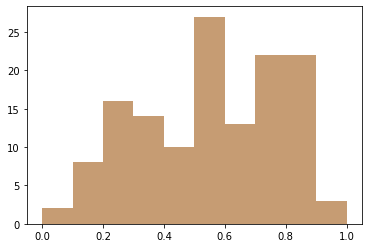

OutlierBoundaryType.QUANTILE


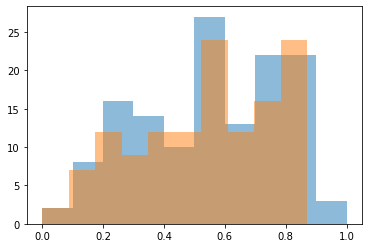

OutlierBoundaryType.IRQ


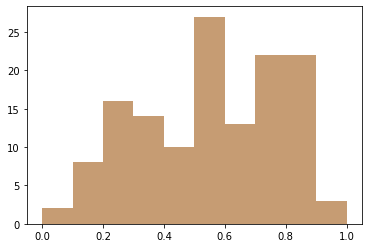

In [29]:
for obt in OutlierBoundaryType:
    lower_boundary, upper_boundary = get_outlier_boundaries(data_scaled3['Explained by: Log GDP per capita'], obt)
    temp_df = np.where(data_scaled3['Explained by: Log GDP per capita'] > upper_boundary, True,
        np.where(data2['Explained by: Log GDP per capita'] < lower_boundary, True, False))
    data_trimmed = data_scaled3.loc[~(temp_df), ]
    plt.hist(data_scaled3['Explained by: Log GDP per capita'], alpha=0.5)
    plt.hist(data_trimmed['Explained by: Log GDP per capita'], alpha=0.5)
    print(obt)
    plt.show()

#### Отбор признаков

##### Удаление коррелирующих признаков

In [30]:
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.80]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [31]:
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [33]:
corr_groups(make_corr_df(data_trimmed))

[['Logged GDP per capita',
  'Explained by: Healthy life expectancy',
  'Healthy life expectancy',
  'lowerwhisker',
  'Ladder score',
  'Explained by: Log GDP per capita'],
 ['Perceptions of corruption', 'Explained by: Perceptions of corruption'],
 ['Explained by: Social support', 'Social support'],
 ['Explained by: Freedom to make life choices',
  'Freedom to make life choices'],
 ['Generosity', 'Explained by: Generosity'],
 ['Ladder score', 'lowerwhisker', 'upperwhisker']]

##### Метод обёртывания

In [37]:
knn = KNeighborsClassifier(n_neighbors=3)

In [44]:
X_columns = ['Ladder score','Standard error of ladder score','Ladder score in Dystopia', 'lowerwhisker', 'Standard error of ladder score', 'Dystopia + residual']
Y1_columns = ['Regional indicator']
Y2_columns = ['Explained by: Log GDP per capita']
X = data2[X_columns]
Y1 = np.ravel(np.where(data[Y1_columns] == 'Latin America and Caribbean', 'Central America',
    np.where(data[Y1_columns] == 'North America and ANZ', 'North America',
    np.where(data[Y1_columns] == 'Middle East and North Africa', 'Africa', data[Y1_columns]))))
Y2 = np.ravel(data2[Y2_columns])

In [45]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X, Y1)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset:', efs1.best_feature_names_)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\Program Files\Anaconda3\lib\site-

D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\Program Files\Anaconda3\lib\site-

Best accuracy score: 0.36
Best subset: ('Standard error of ladder score', 'lowerwhisker', 'Dystopia + residual')


##### Метод вложений

In [46]:
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(X, Y1)
e_lr1.coef_

array([[-1.60468633e-01, -1.17504023e+00,  0.00000000e+00,
        -8.13333712e-01, -6.58372870e-05, -1.51040660e+00],
       [ 3.08297295e+00,  4.62340016e+00,  0.00000000e+00,
         3.95440674e+00,  5.55805493e+00,  1.20691437e+00],
       [ 1.13543381e-02, -3.34306907e+00,  0.00000000e+00,
         0.00000000e+00, -2.37442281e+00,  2.23475823e+00],
       [-1.41673194e+00, -5.83196356e+00,  0.00000000e+00,
        -7.49060962e-01, -5.67568838e+00, -1.38257965e+00],
       [ 1.16781923e+00, -7.31195947e+00,  0.00000000e+00,
         4.97971476e-01, -8.17635931e+00, -4.82023446e+00],
       [ 9.13019711e+00,  9.97922717e-01,  0.00000000e+00,
         9.12020354e+00,  3.20998740e+00, -6.68956247e+00],
       [-1.31185607e+00, -3.11298322e+00,  0.00000000e+00,
        -4.83166068e+00, -2.09403259e+00, -4.80975290e-01],
       [ 8.00556537e-01, -3.85412243e+00,  0.00000000e+00,
         5.59713137e-01,  0.00000000e+00, -4.71755957e+00],
       [-8.10691643e+00,  2.24813776e+00,  0.000

In [47]:
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(X, Y1)
sel_e_lr1.get_support()

array([ True,  True, False,  True,  True,  True])